This is a "toy project" meant for learning and testing the basics of ML. The task is a simple regression problem, where the goal is to approximate the value of a sine wave in is's first period after zero. The does not need ML to solve it however it can taught you some usefull insight for more complex problems.

**Table of contents**<a id='toc0_'></a>    
- [Requirements](#toc1_1_)    
- [Load input data](#toc1_2_)    
- [Examine data](#toc1_3_)    
- [Regression problem](#toc1_4_)    
  - [Model definition](#toc1_4_1_)    
  - [Callbacks (not done yet)](#toc1_4_2_)    
  - [Custom metric funtion implementation](#toc1_4_3_)    
  - [Setting up plots for monitoring the learning](#toc1_4_4_)    
  - [Performing the initial learning](#toc1_4_5_)    
    - [Content of the history varible](#toc1_4_5_1_)    
  - [Showing the initial results](#toc1_4_6_)    
- [Finetuning the model](#toc1_5_)    
  - [Error is still high, train it longer](#toc1_5_1_)    
  - [Result getting better but learning is slow, increase the network size](#toc1_5_2_)    
  - [Experiment with smaller batch size](#toc1_5_3_)    
  - [Instead of batch size, modify the network - better results with a deeper network](#toc1_5_4_)    
  - [Decreasing the widht of the model and inceasing the depth](#toc1_5_5_)    
  - [Changing Loss function for smaller errors](#toc1_5_6_)    
  - [Using dirty tricks from the book - Regularization](#toc1_5_7_)    
  - [Using dirty tricks from the book - Dropout](#toc1_5_8_)    
  - [Increasing traning time (epochs)](#toc1_5_9_)    
  - [Lessons learned](#toc1_5_10_)    
  - [Doing the final learning with train and validation dataset](#toc1_5_11_)    
- [Evaulating the performance of the model](#toc1_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Requirements](#toc0_)

pip install ipykernel numpy tensorflow scikit-learn



## <a id='toc1_2_'></a>[Load input data](#toc0_)

In [525]:
# Load in input data (DIY)
import numpy as np

def read_input_data(file_path):
    temp_list = []
    with open(file_path) as f:
        lines=f.readlines()
        for line in lines:
            line = line.split()
            if line:            
                line = [float(numbers) for numbers in line]
                temp_list.append(line)
    return np.array(temp_list)

method_A = read_input_data(r'data_source\test_data.txt')

# ------------------------------------------------------------

# Load in input data (Easier way)        
method_B = np.loadtxt(r'data_source\test_data.txt', delimiter=' ', dtype=float)


print((method_A==method_B).all())   
print(method_A.shape)
print(method_B.shape)

True
(100, 2)
(100, 2)


In [526]:
test_data = np.loadtxt(r'data_source\test_data.txt', delimiter=' ', dtype=float)
training_data = np.loadtxt(r'data_source\training_data.txt', delimiter=' ', dtype=float)
validation_data = np.loadtxt(r'data_source\validation_data.txt', delimiter=' ', dtype=float)

## <a id='toc1_3_'></a>[Examine data](#toc0_)

Offset added for better visibility

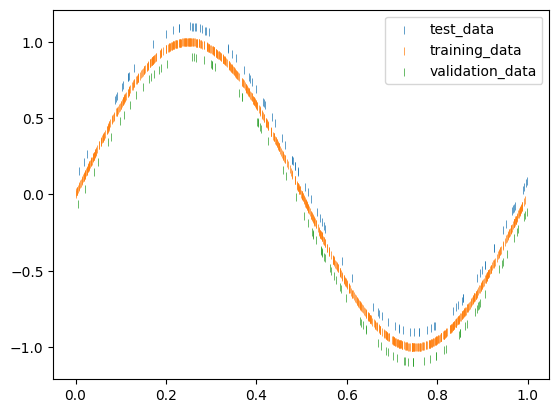

In [527]:

import matplotlib.pyplot as plt

plt.scatter(x = test_data[:,0] ,  y = test_data[:,1] + 0.1   ,marker="|" , label = "test_data"  , linewidths=0.5)
plt.scatter(x = training_data[:,0] ,  y = training_data[:,1] ,  marker="|" , label = "training_data" , linewidths=0.5 )
plt.scatter(x = validation_data[:,0] ,  y = validation_data[:,1] - 0.1 ,  marker="|" , label = "validation_data" , linewidths=0.5)
plt.legend()

## <a id='toc1_4_'></a>[Regression problem](#toc0_)

- No activation at the end
- MSE for loss function (typically for regression)
- Optimizer Rmsprop/Adagrad
- Custom metric implemented (mean_absolute_error_percentage)
- Model summary for debugging and deeper understanding


### <a id='toc1_4_1_'></a>[Model definition](#toc0_)

In [528]:
from keras import models
from keras import layers
import tensorflow as tf

def summary(model: tf.keras.Model) -> str:
  summary = []
  model.summary(print_fn=lambda x: summary.append(x))
  return '\n'.join(summary)

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (1,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  

#https://github.com/bnsreenu/python_for_microscopists/blob/master/tips_tricks_37_Understanding%20MAE%20and%20MSE.py
#https://stackoverflow.com/questions/52357542/attributeerror-tensor-object-has-no-attribute-numpy

 
X_train = training_data[:,0]
Y_train = training_data[:,1]
X_val = validation_data[:,0]
Y_val = validation_data[:,1]


model.summary()


Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_167 (Dense)           (None, 32)                64        
                                                                 
 dense_168 (Dense)           (None, 32)                1056      
                                                                 
 dense_169 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [529]:
test_data[ : , 1 ]

array([-0.59413172, -0.45307409, -0.82230611,  0.66874362,  0.22203742,
       -0.95868727,  0.71754437, -0.99999201,  0.11647421,  0.85577203,
        0.27205548,  0.66839621,  0.79208906,  0.50798952,  0.11387754,
        0.88250991,  0.99793372, -0.77891948, -0.53358159,  0.97288834,
       -0.0142831 ,  0.9987619 , -0.08652634, -0.99783273, -0.93279885,
        0.40576434, -0.98564704,  0.08913979, -0.97655003,  0.05415628,
       -0.17814815, -0.97750719,  0.54311298,  0.72668553, -0.20884497,
        0.9914954 ,  0.16348055,  0.99979487,  0.12666053, -0.29603011,
        0.59219933, -0.98617595, -0.86277403,  0.53137383, -0.64653821,
       -0.02648457, -0.30660164, -0.21499142,  0.82102055, -0.332195  ,
       -0.18985417,  0.6037806 , -0.32590131,  0.48379382, -0.88124256,
        0.6783237 ,  0.9953621 ,  0.98372481,  0.12712246, -0.96324784,
       -0.77906334, -0.97392646, -0.896103  ,  0.52085161,  0.63879271,
       -0.87234744,  0.96160156, -0.04910468, -0.56167609,  0.66

### <a id='toc1_4_2_'></a>[Callbacks (not done yet)](#toc0_)

In [530]:
# NOT DONE YET

"""""

class Metrics(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self._data = []

    def on_epoch_end(self, batch, logs={}):
        X_val, y_val = self.validation_data[0], self.validation_data[1]
        y_predict = np.asarray(model.predict(X_val))

        y_val = np.argmax(y_val, axis=1)
        y_predict = np.argmax(y_predict, axis=1)

        self._data.append({
            'val_rocauc': roc_auc_score(y_val, y_predict),
        })
        return

    def get_data(self):
        return self._data

metrics = Metrics()
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[metrics])
metrics.get_data()

"""


'""\n\nclass Metrics(keras.callbacks.Callback):\n    def on_train_begin(self, logs={}):\n        self._data = []\n\n    def on_epoch_end(self, batch, logs={}):\n        X_val, y_val = self.validation_data[0], self.validation_data[1]\n        y_predict = np.asarray(model.predict(X_val))\n\n        y_val = np.argmax(y_val, axis=1)\n        y_predict = np.argmax(y_predict, axis=1)\n\n        self._data.append({\n            \'val_rocauc\': roc_auc_score(y_val, y_predict),\n        })\n        return\n\n    def get_data(self):\n        return self._data\n\nmetrics = Metrics()\nhistory = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[metrics])\nmetrics.get_data()\n\n'

### <a id='toc1_4_3_'></a>[Custom metric funtion implementation](#toc0_)

In [531]:
#https://www.tensorflow.org/api_docs/python/tf/keras/metrics/mean_absolute_percentage_error

def percentage_metric(y_true, y_pred):
        result = (100. * np.mean(np.abs((y_true - y_pred) / y_true), axis=-1)) 
        
        #First value of all batch during the traning, can be observed during traning
        
        #print(f"Current true value:  {y_true[0].numpy()}  -- Current predicted value:  {y_pred[0].numpy()} \n")
        
        return result



### <a id='toc1_4_4_'></a>[Setting up plots for monitoring the learning](#toc0_)

In [532]:

import matplotlib.gridspec as gridspec
from textwrap import wrap

def training_plot(history , epoch , batch_size, model_summary = ""):

    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    acc = history.history["mean_absolute_error"]
    val_acc = history.history["val_mean_absolute_error"]
    custom_perc = history.history['percentage_metric']
    val_custom_perc = history.history['val_percentage_metric']


    # Original solution
    #fig , [[loss_plot , acc_plot] , [custom_plot , placeholder]] = plt.subplots(2,2) 
    
    #https://stackoverflow.com/questions/37360568/python-organisation-of-3-subplots-with-matplotlib
    
    gs = gridspec.GridSpec(2, 2)
    fig = plt.figure()
    
    loss_plot = plt.subplot(gs[1, :]) 
    acc_plot = plt.subplot(gs[0, 0]) 
    custom_plot = plt.subplot(gs[0, 1]) 
    
    fig.set_figwidth(10)
    fig.set_figheight(7)

    
    loss_plot.set_xticks(range(1 , len(loss) + 1)) # Only dislpay Epochs
    acc_plot.set_xticks(range(1 , len(loss) + 1)) # Only dislpay Epochs

    loss_plot.plot(range(1, len(loss) + 1), loss ,label = "Traning Loss", marker = "o")
    loss_plot.plot(range(1, len(loss) + 1), val_loss, label = "Validation Loss" , marker = "o")
    loss_plot.set_xlabel("Epochs")
    loss_plot.set_ylabel("MSE")
    loss_plot.legend()


    acc_plot.plot(range(1, len(acc) + 1), acc ,label = "Traning MAE", marker = "o")
    acc_plot.plot(range(1, len(acc) + 1), val_acc, label = "Validation MAE" , marker = "o")
    acc_plot.set_xlabel("Epochs")
    acc_plot.set_ylabel("MAE")
    acc_plot.legend()

    custom_plot.plot(range(1, len(acc) + 1), custom_perc ,label = "Percentage Accuracy", marker = "o")
    custom_plot.plot(range(1, len(acc) + 1), val_custom_perc, label = "Validation Percentage Accuracy" , marker = "o")
    custom_plot.set_xlabel("Epochs")
    custom_plot.set_ylabel("Percentage Accuracy")
    custom_plot.legend()


    text = fig.text(0.50, -0.62, f'Epochs: {epoch} , Batch size: {batch_size} \n\n\n\n {model_summary}', horizontalalignment='center',  wrap=False ) 

    fig.tight_layout(rect=(0,.05,1,1)) 
    plt.show()

    


### <a id='toc1_4_5_'></a>[Performing the initial learning](#toc0_)

In [533]:

epoch = 5
batch_size = 10

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=1)

Epoch 1/5


80/80 [==============================] - 2s 19ms/step - loss: 0.3804 - mean_absolute_error: 0.5374 - percentage_metric: 13.6319 - val_loss: 0.2551 - val_mean_absolute_error: 0.4375 - val_percentage_metric: 41.3886
Epoch 2/5
80/80 [==============================] - 1s 19ms/step - loss: 0.2160 - mean_absolute_error: 0.4057 - percentage_metric: 15.7201 - val_loss: 0.1577 - val_mean_absolute_error: 0.3497 - val_percentage_metric: 74.2652
Epoch 3/5
80/80 [==============================] - 1s 18ms/step - loss: 0.1304 - mean_absolute_error: 0.3190 - percentage_metric: 21.6452 - val_loss: 0.1208 - val_mean_absolute_error: 0.2919 - val_percentage_metric: 94.3337
Epoch 4/5
80/80 [==============================] - 1s 18ms/step - loss: 0.1050 - mean_absolute_error: 0.2772 - percentage_metric: 22.9817 - val_loss: 0.1117 - val_mean_absolute_error: 0.2674 - val_percentage_metric: 104.9605
Epoch 5/5
80/80 [==============================] - 1s 19ms/step - loss: 0.0954 - mean_absolute_error: 0.2530 - pe

#### <a id='toc1_4_5_1_'></a>[Content of the history varible](#toc0_)

In [534]:
history.history


{'loss': [0.38040268421173096,
  0.2159687876701355,
  0.13044653832912445,
  0.10503815859556198,
  0.09535914659500122],
 'mean_absolute_error': [0.5373820066452026,
  0.40567439794540405,
  0.31903988122940063,
  0.2772064507007599,
  0.2530496120452881],
 'percentage_metric': [13.631938934326172,
  15.720050811767578,
  21.645231246948242,
  22.981706619262695,
  23.49017906188965],
 'val_loss': [0.2551451623439789,
  0.15772905945777893,
  0.12082832306623459,
  0.11171538382768631,
  0.10411620140075684],
 'val_mean_absolute_error': [0.43749988079071045,
  0.34969618916511536,
  0.29188403487205505,
  0.2674022614955902,
  0.255682110786438],
 'val_percentage_metric': [41.38858413696289,
  74.26518249511719,
  94.33370208740234,
  104.96051025390625,
  94.1739730834961]}

### <a id='toc1_4_6_'></a>[Showing the initial results](#toc0_)

- Percenage Accuracy may not be the best metric
- Maybe overfitting after 4. epoch

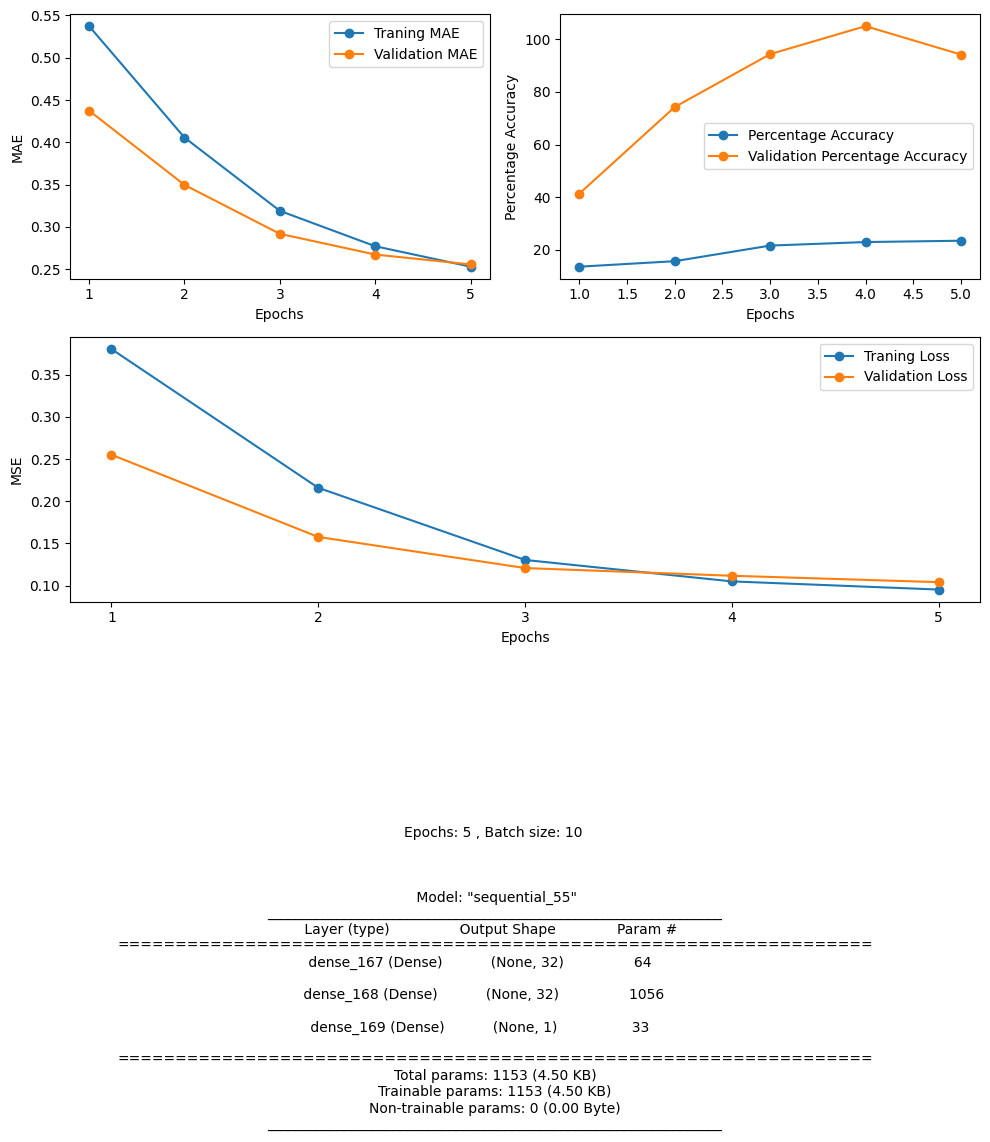

In [535]:
training_plot(history , epoch, batch_size, summary(model))

## <a id='toc1_5_'></a>[Finetuning the model](#toc0_)

### <a id='toc1_5_1_'></a>[Error is still high, train it longer](#toc0_)

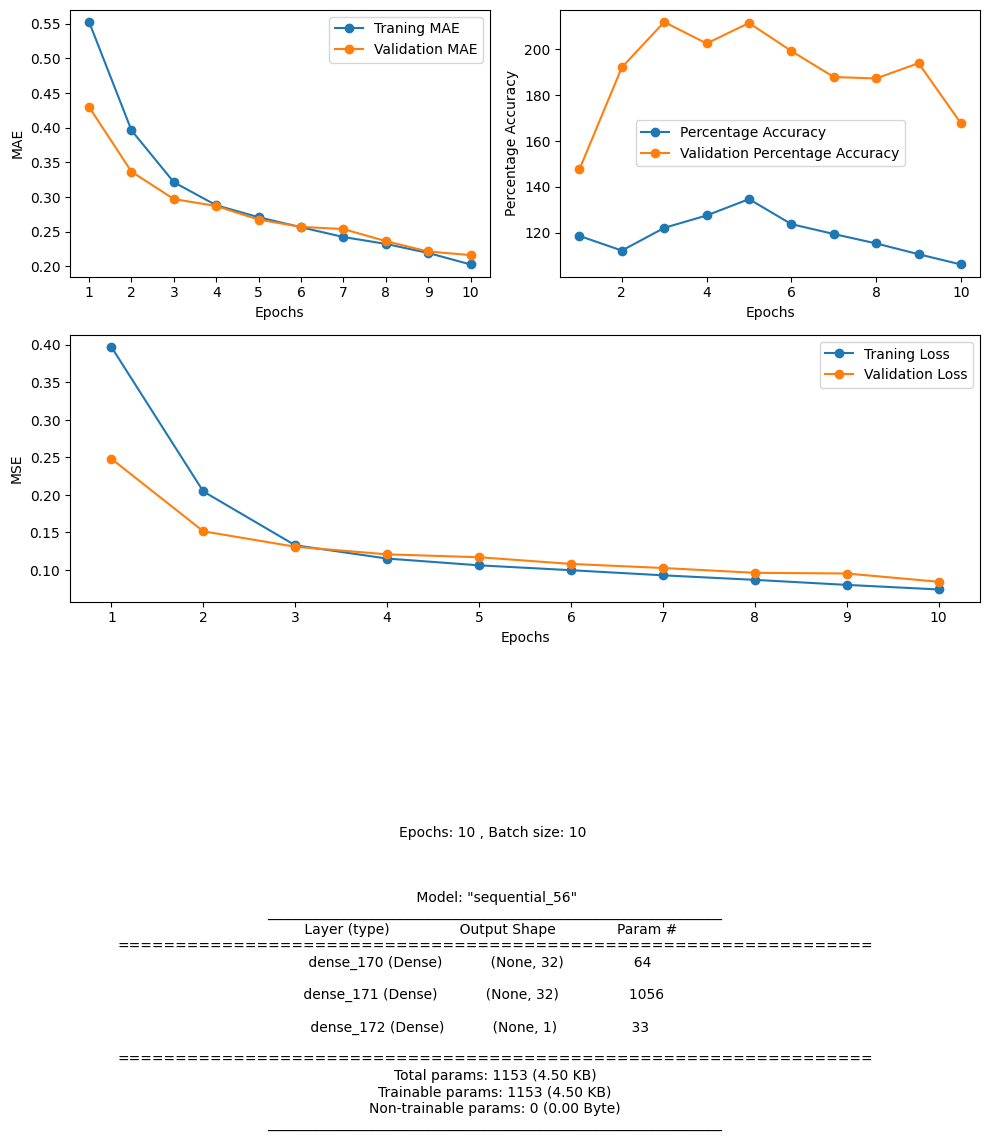

In [536]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (1,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  
epoch = 10
batch_size = 10

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=0)

training_plot(history , epoch, batch_size, summary(model))

### <a id='toc1_5_2_'></a>[Result getting better but learning is slow, increase the network size](#toc0_)

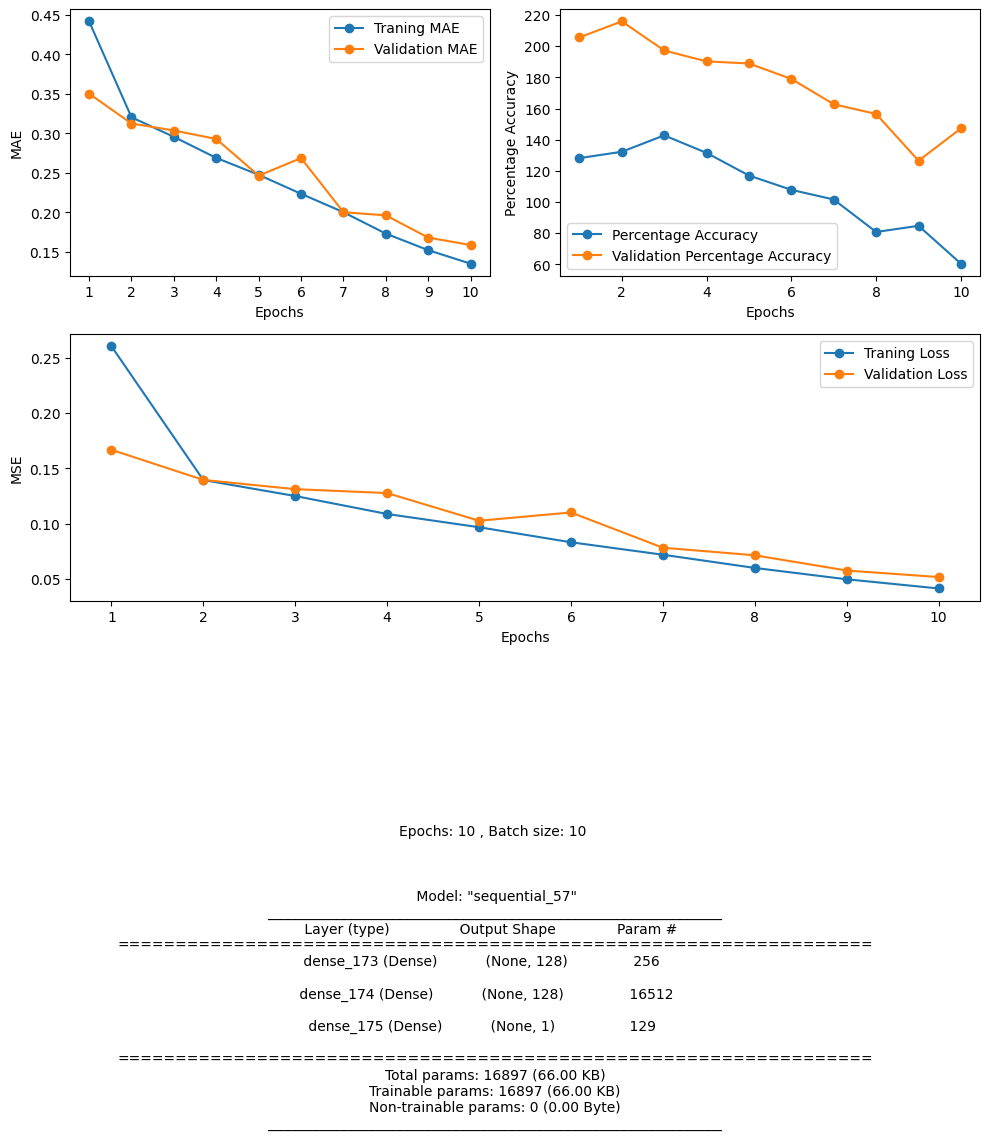

In [537]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape = (1,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  
epoch = 10
batch_size = 10

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=0)

training_plot(history , epoch, batch_size, summary(model))

### <a id='toc1_5_3_'></a>[Experiment with smaller batch size](#toc0_)

- Interestingly it did not improve the model that much but the run time almost doubled

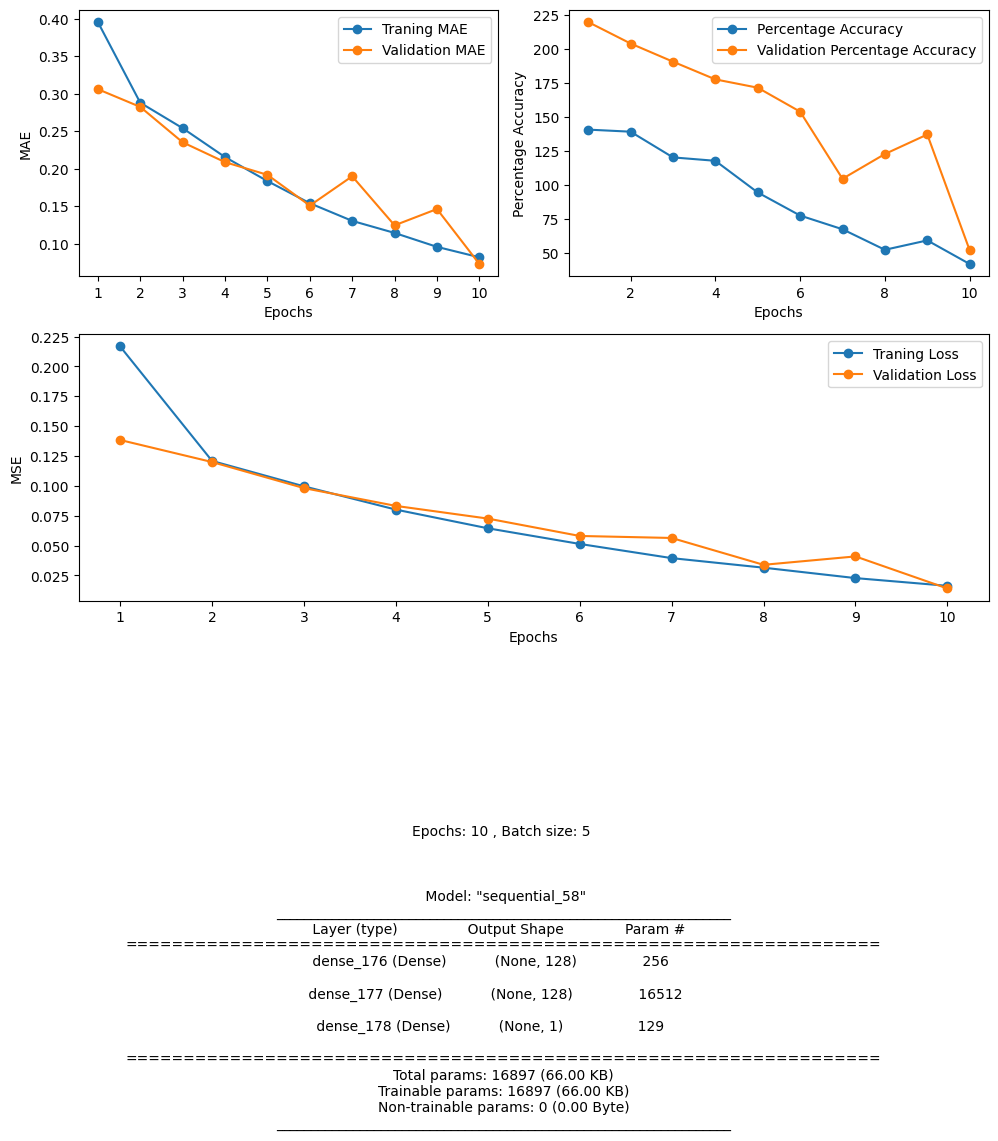

In [538]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape = (1,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  
epoch = 10
batch_size = 5

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=0)

training_plot(history , epoch, batch_size, summary(model))

### <a id='toc1_5_4_'></a>[Instead of batch size, modify the network - better results with a deeper network](#toc0_)

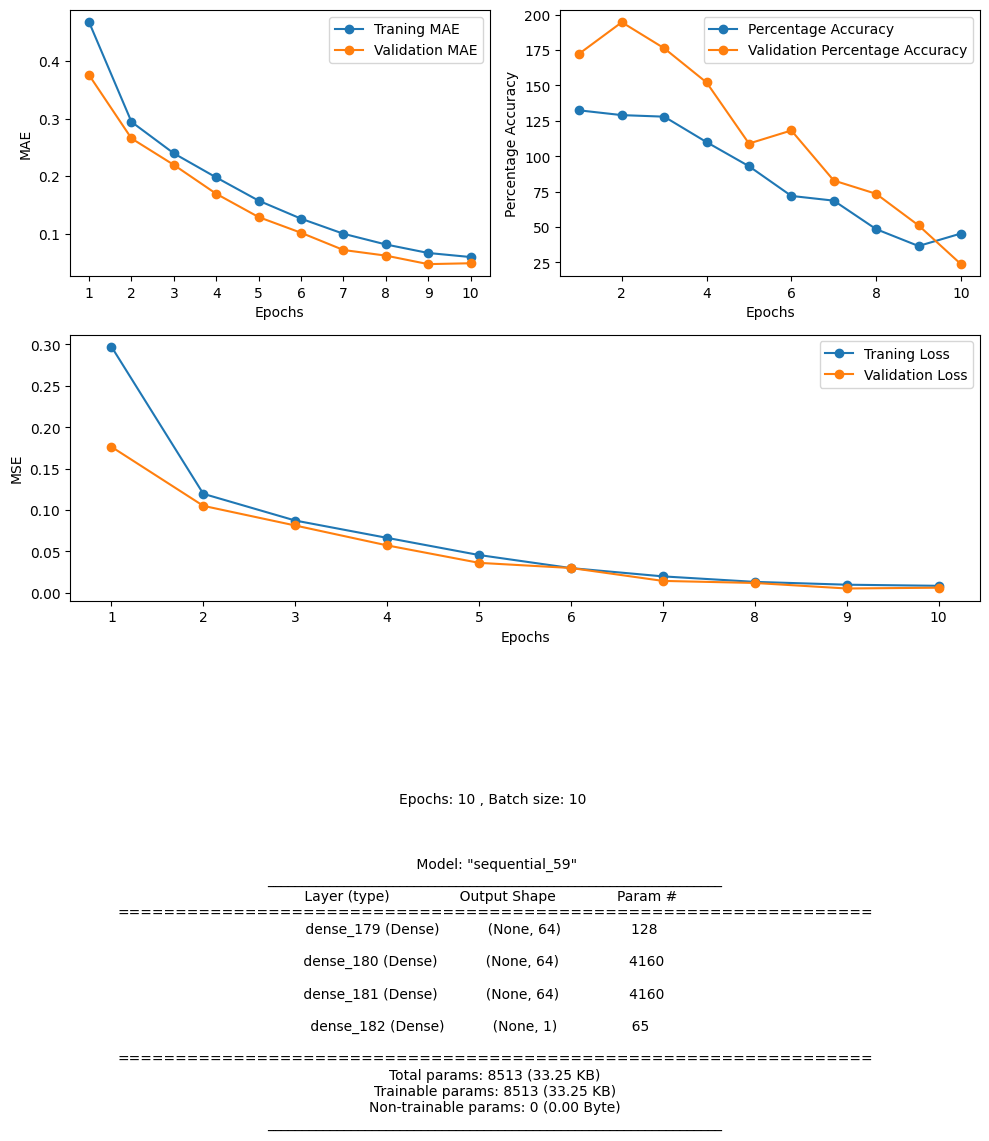

In [539]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape = (1,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  
epoch = 10
batch_size = 10

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=0)

training_plot(history , epoch, batch_size, summary(model))

### <a id='toc1_5_5_'></a>[Decreasing the widht of the model and inceasing the depth](#toc0_)


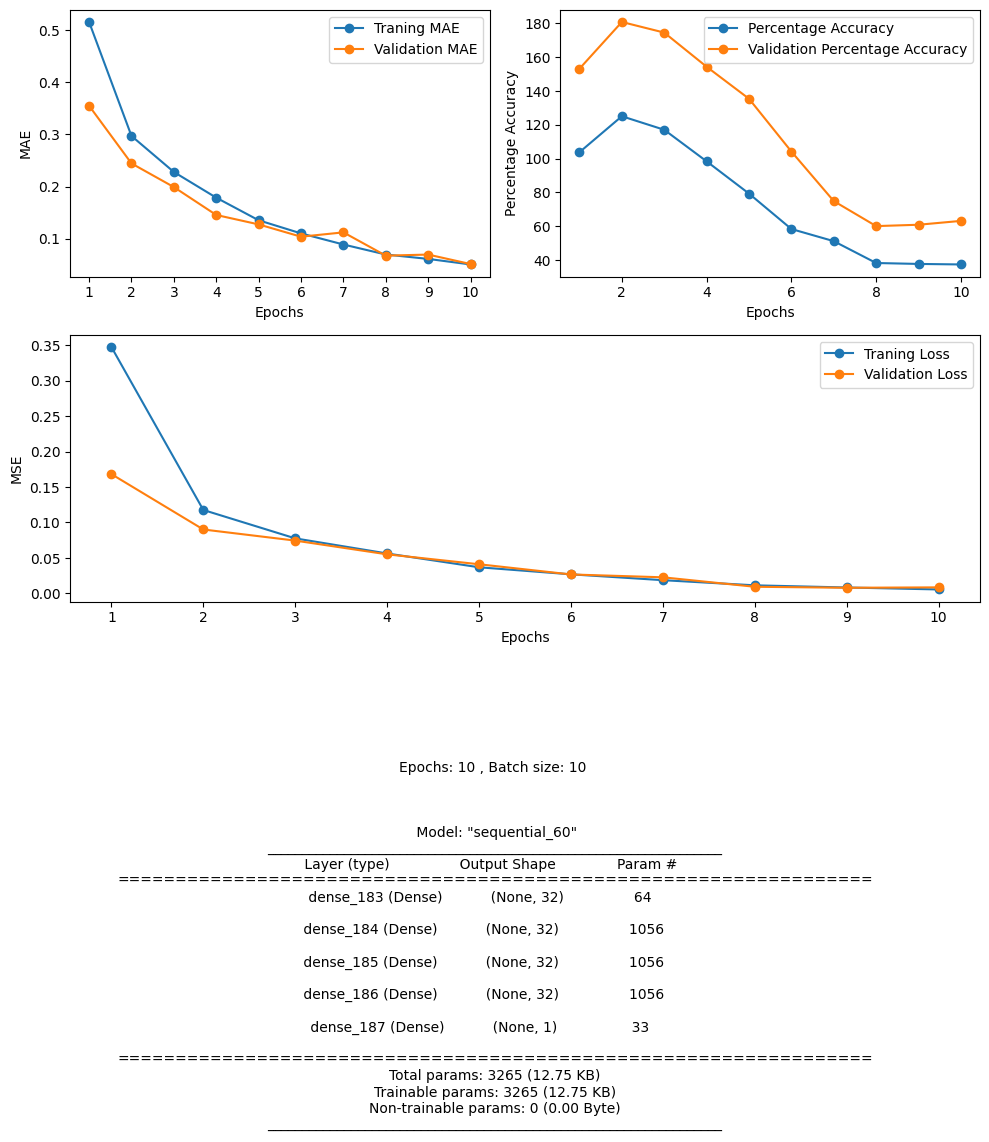

In [540]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (1,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  
epoch = 10
batch_size = 10

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=0)

training_plot(history , epoch, batch_size, summary(model))

### <a id='toc1_5_6_'></a>[Changing Loss function for smaller errors](#toc0_)



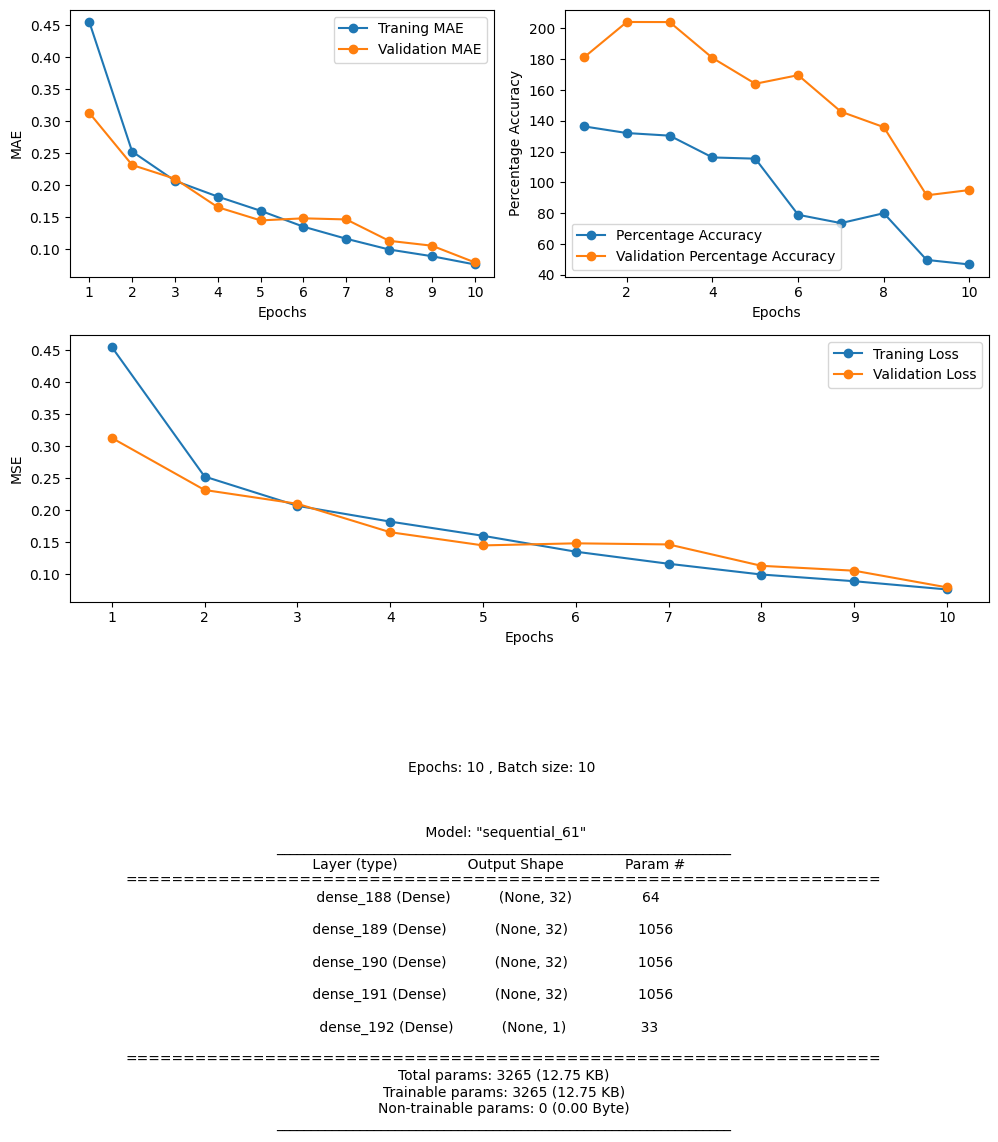

In [541]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape = (1,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mean_absolute_error', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  
epoch = 10
batch_size = 10

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=0)

training_plot(history , epoch, batch_size, summary(model))

### <a id='toc1_5_7_'></a>[Using dirty tricks from the book - Regularization](#toc0_)

(https://neptune.ai/blog/fighting-overfitting-with-l1-or-l2-regularization)

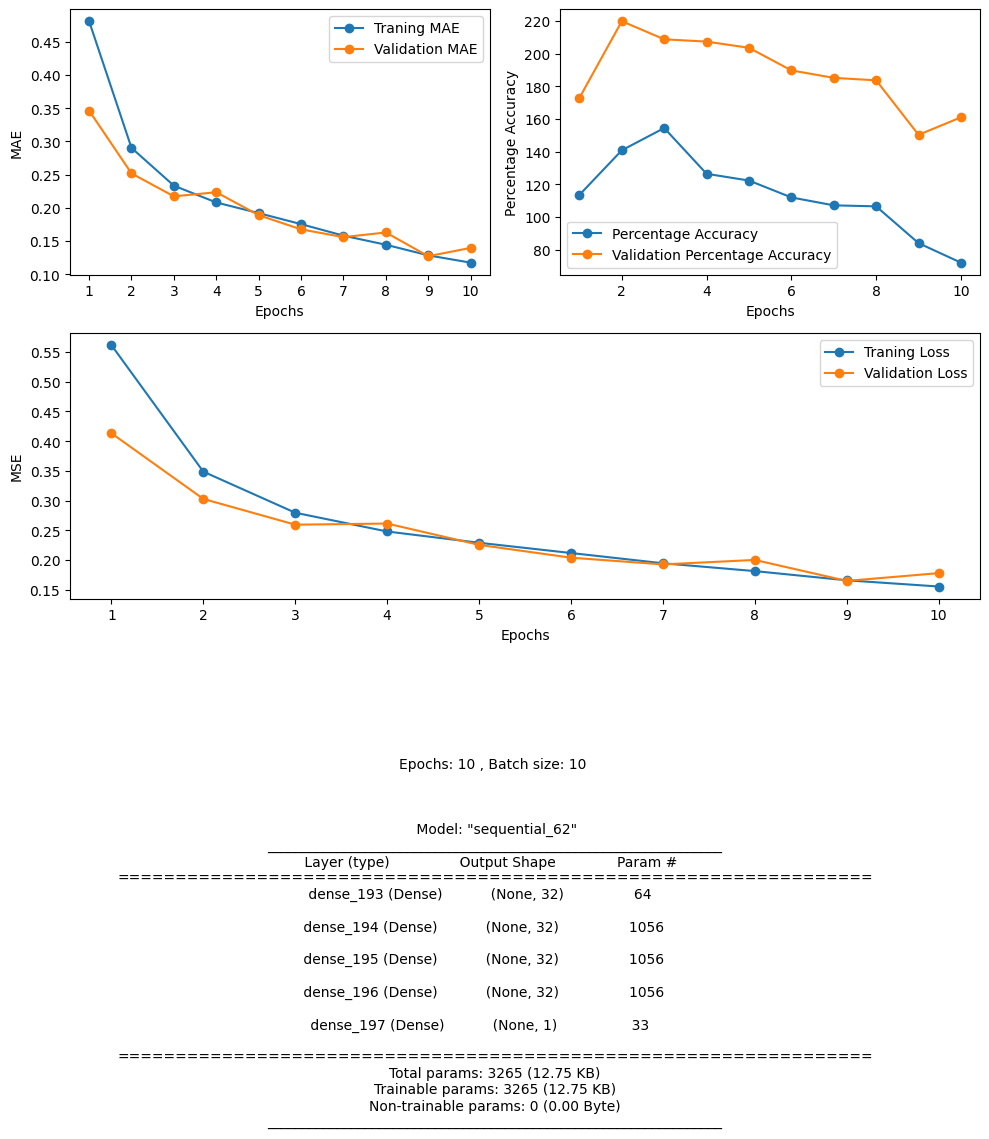

In [542]:
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001), input_shape = (1,)))
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001)))
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001)))
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001)))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mean_absolute_error', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  
epoch = 10
batch_size = 10

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=0)

training_plot(history , epoch, batch_size, summary(model))

### <a id='toc1_5_8_'></a>[Using dirty tricks from the book - Dropout](#toc0_)

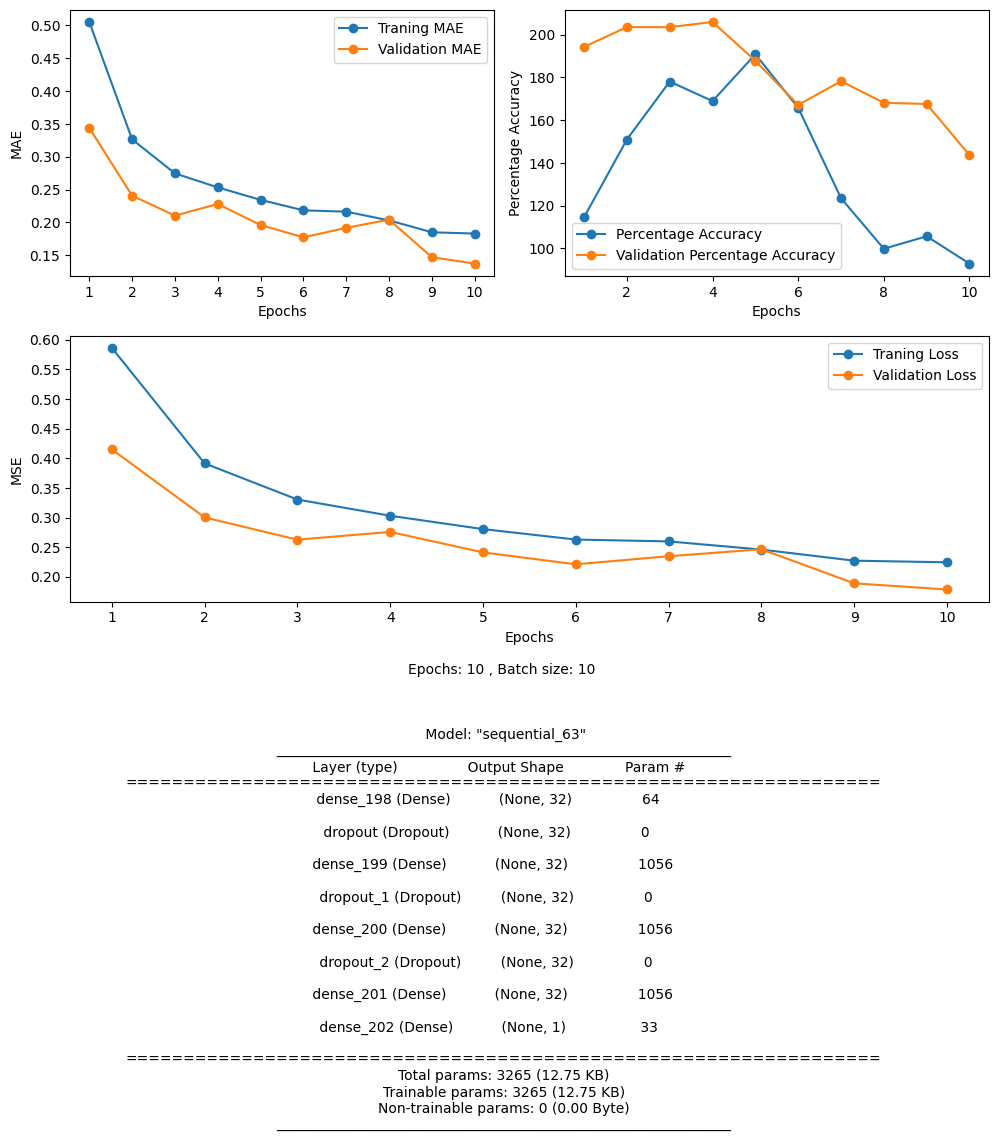

In [543]:
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001), input_shape = (1,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001)))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mean_absolute_error', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  
epoch = 10
batch_size = 10

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=0)

training_plot(history , epoch, batch_size, summary(model))

### <a id='toc1_5_9_'></a>[Increasing traning time (epochs)](#toc0_)

- It seems that this not help learning, we need a bigger network

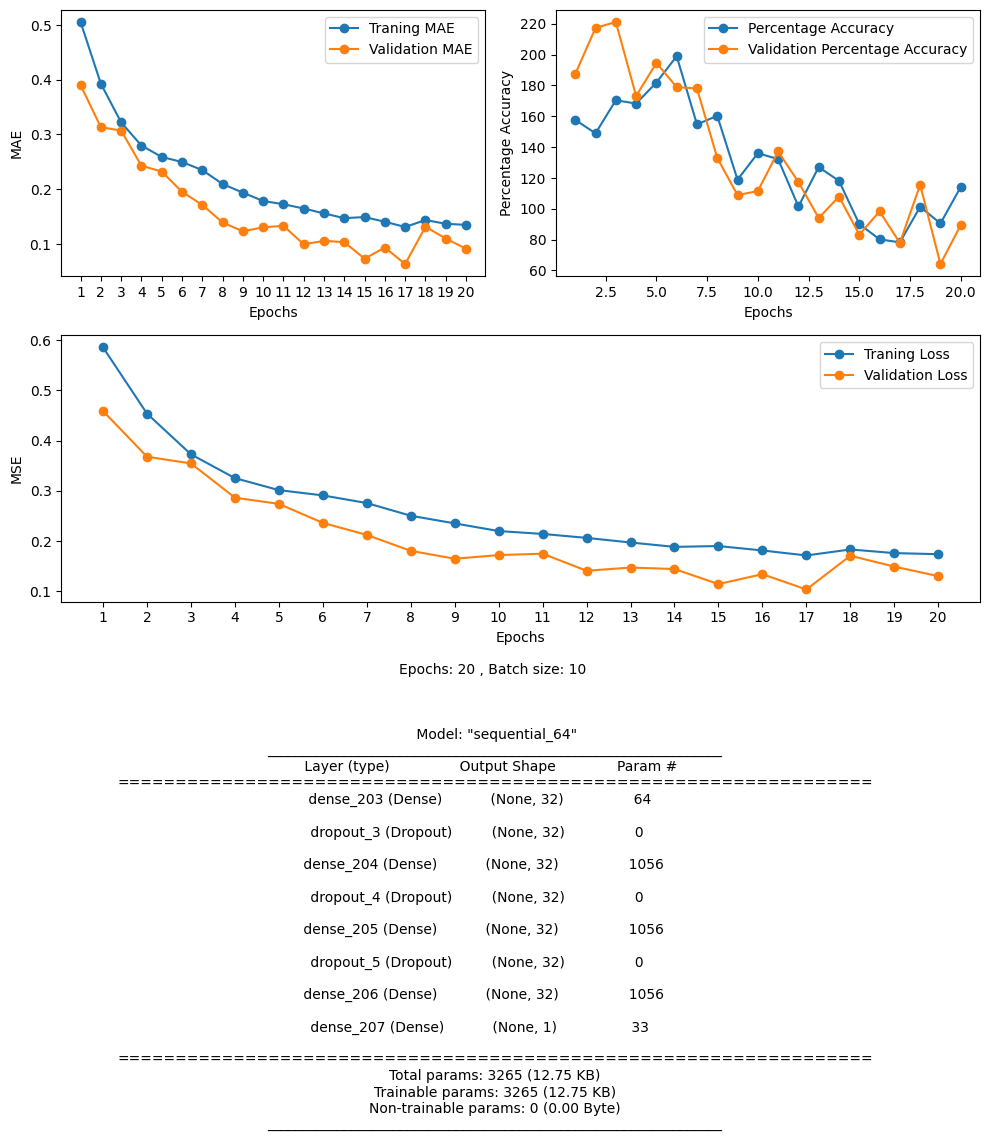

In [544]:
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001), input_shape = (1,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(32, activation='relu' , kernel_regularizer= regularizers.l2(0.001)))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mean_absolute_error', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  
epoch = 20
batch_size = 10

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=0)

training_plot(history , epoch, batch_size, summary(model))

### <a id='toc1_5_10_'></a>[Lessons learned](#toc0_)

- No need for regularization, no real overfitting in this problem
- After 25 epoch we don't see improvement
- A network of 2 x 128 is enough

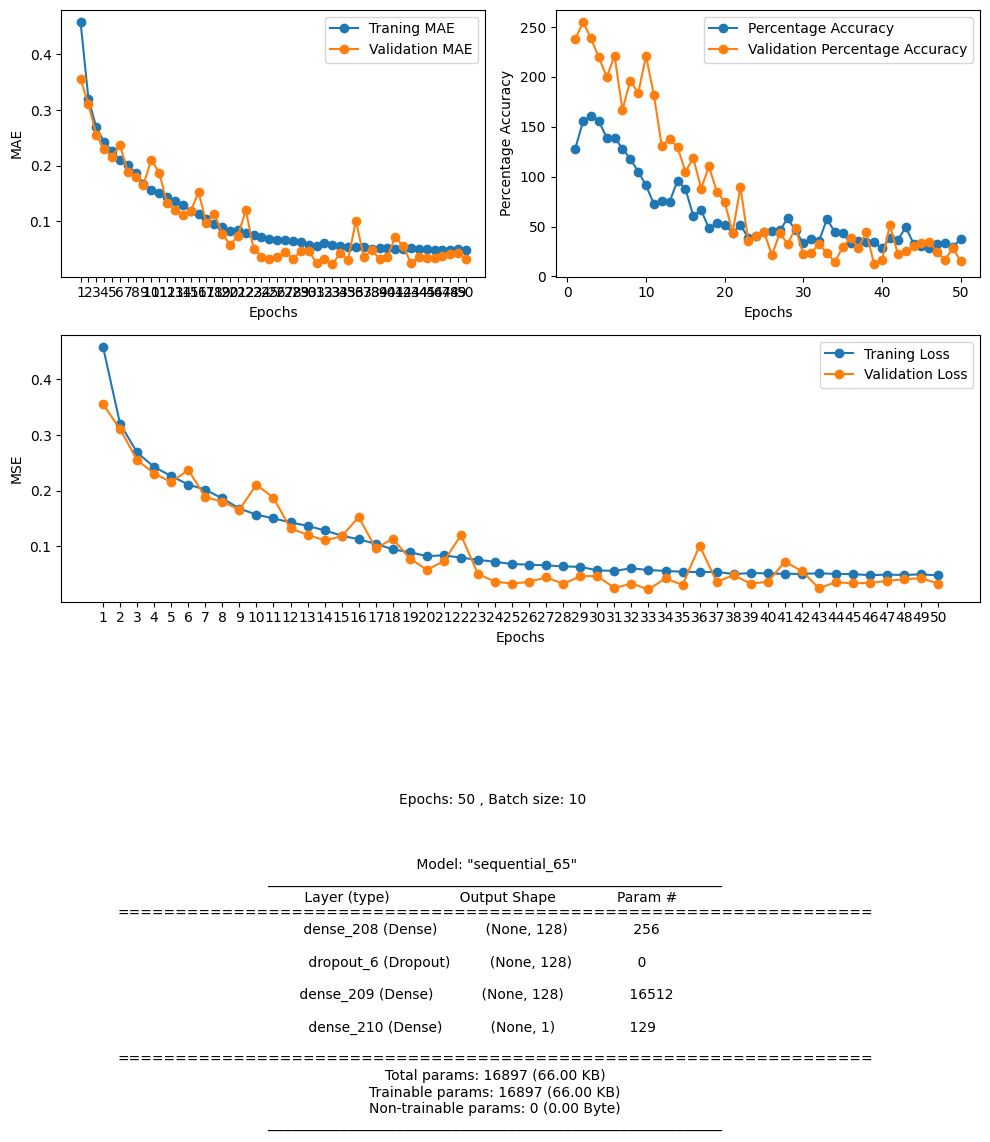

In [545]:
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape = (1,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mean_absolute_error', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  
epoch = 50
batch_size = 10

history = model.fit(X_train, Y_train,
                    validation_data=(X_val, Y_val),
                    epochs=epoch, batch_size=batch_size, verbose=0)

training_plot(history , epoch, batch_size, summary(model))

### <a id='toc1_5_11_'></a>[Doing the final learning with train and validation dataset](#toc0_)

In [546]:
from tensorflow.keras import regularizers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape = (1,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mean_absolute_error', metrics=['mean_absolute_error'  , percentage_metric] , run_eagerly=True)  
epoch = 25
batch_size = 10

history = model.fit(np.concatenate((X_train, X_val) , axis=0), np.concatenate((Y_train, Y_val) , axis=0),
                    epochs=epoch, batch_size=batch_size, verbose=0)


## <a id='toc1_6_'></a>[Evaulating the performance of the model](#toc0_)

In [547]:
model.evaluate(test_data[:,0], test_data[:,1])

4/4 [==============================] - 0s 9ms/step - loss: 0.0687 - mean_absolute_error: 0.0687 - percentage_metric: 58.1143


[0.06866703182458878, 0.06866703182458878, 58.114322662353516]

4/4 [==============================] - 0s 3ms/step


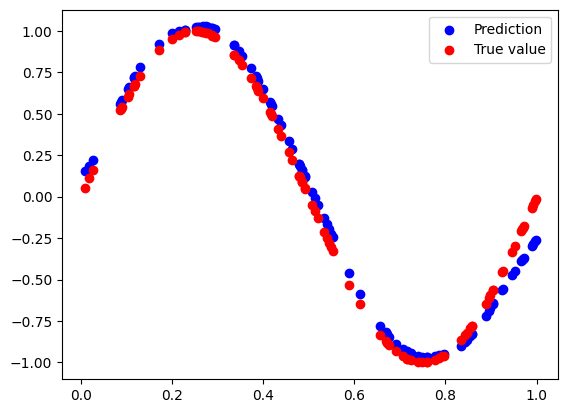

In [548]:
predictions = model.predict(test_data[:,0])
true_values = test_data[:,1]

fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(x = test_data[:,0], y = predictions, c='b',  label='Prediction')
ax1.scatter(x = test_data[:,0] , y = true_values,  c='r',  label='True value')
plt.legend()
plt.show()

4/4 [==============================] - 0s 3ms/step


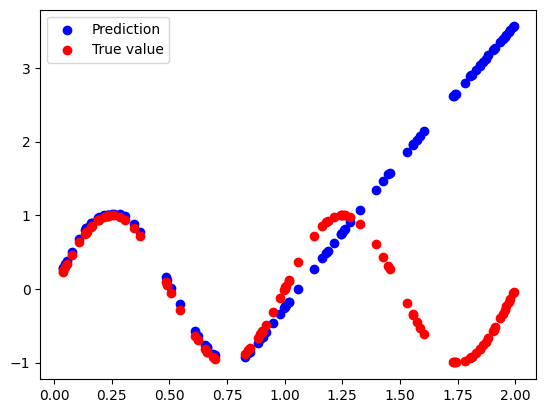

In [549]:
from random import random

lenght = 2

new_inputs = [(random() * lenght ) for i in range(100)]

predictions = model.predict(new_inputs)
true_values = [(np.sin(input * 2 * np.pi)) for input in new_inputs]


fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(x = new_inputs, y = predictions, c='b',  label='Prediction')
ax1.scatter(x = new_inputs , y = true_values,  c='r',  label='True value')
plt.legend()
plt.show()